In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd

#For data Visualization
import matplotlib.pyplot as plt

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#there is no null values
#but there is 0 which have to be resolved

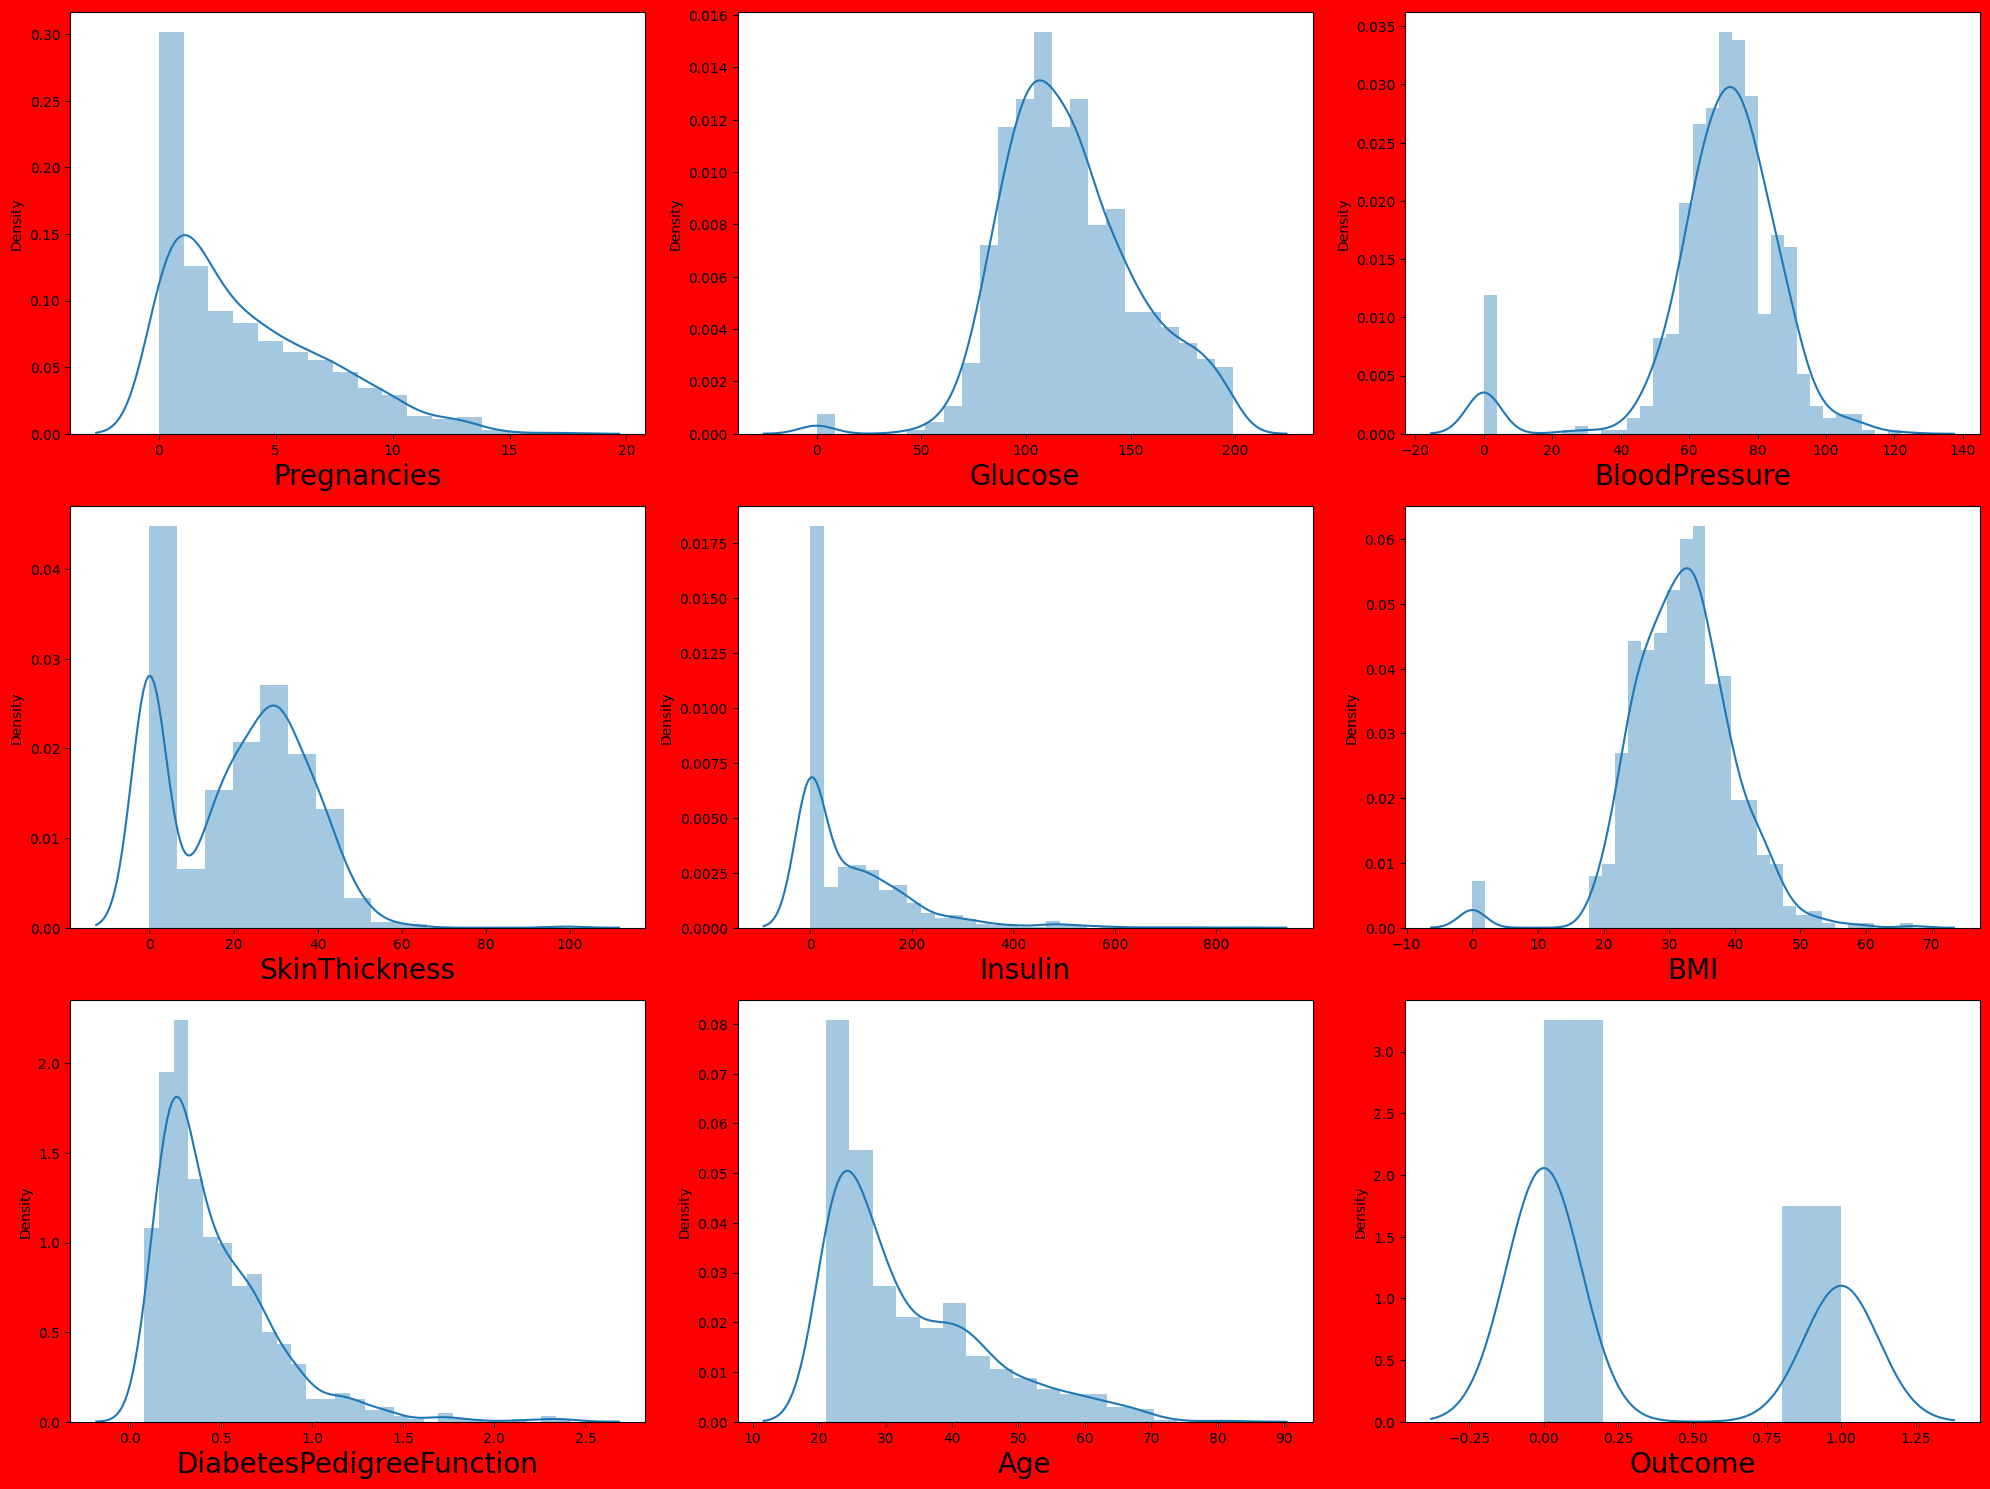

In [5]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [6]:
#there are 0 values in some feature which have to be removed
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

In [7]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

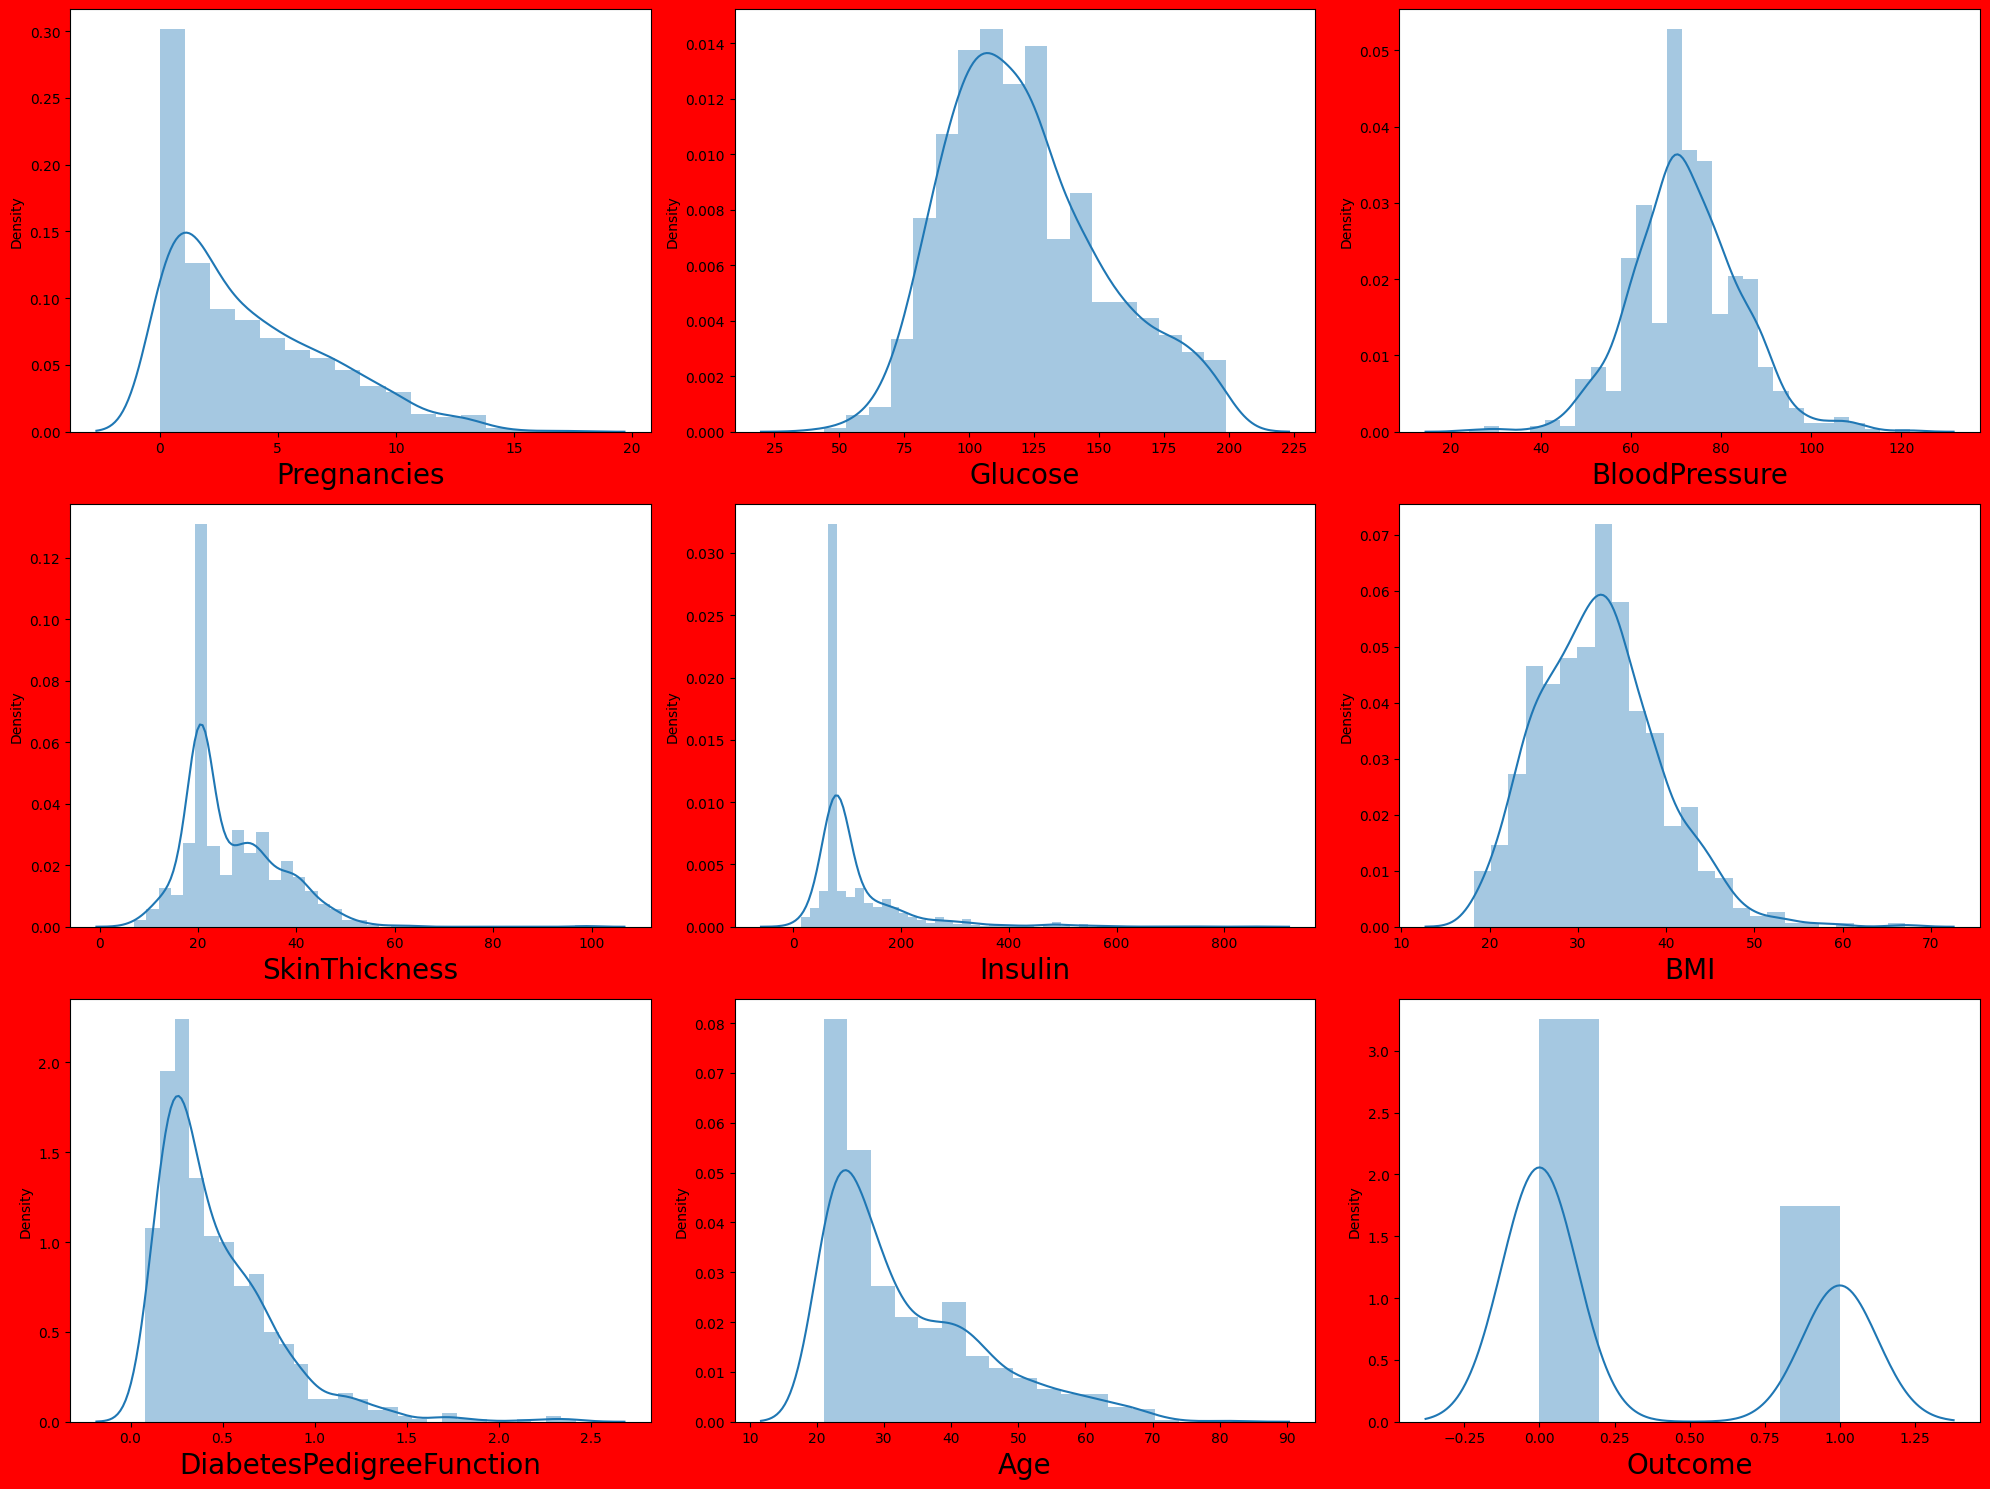

In [9]:
#plotting again to see if issue is resolved
plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [ ]:
#Now its Good Looking
#But i think there is outliers
#Lets go And Fix this also
#Lets see by Boxplot

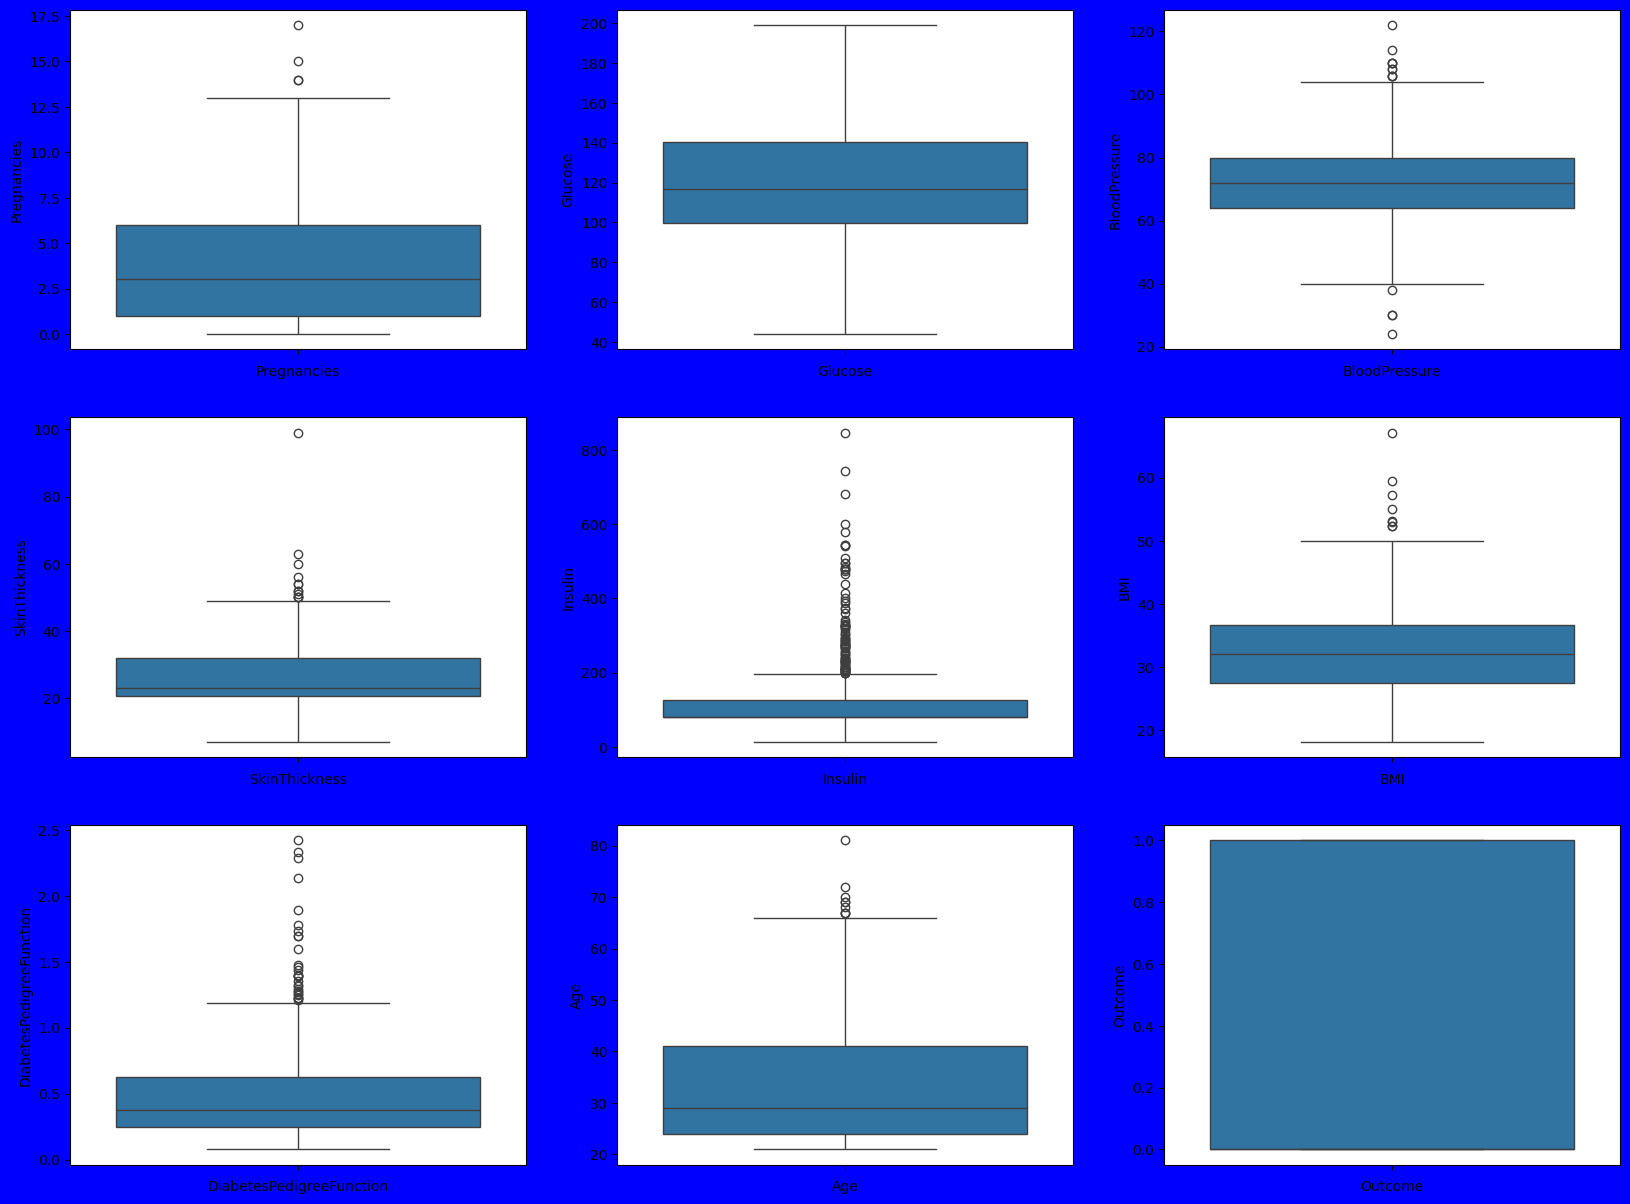

In [10]:
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber=1
for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column)
    plotnumber +=1
plt.show()

In [11]:
#There are lots of outliers
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# we have to remove outliers

In [13]:
q1=data.quantile (0.25)
q3=data.quantile (0.75)

In [14]:
iqr=q3-q1
print(q1)
print(q3)
print(iqr)

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64
Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382

In [15]:
#Pregnancies
preg=q3.Pregnancies +(1.5*iqr.Pregnancies)
index=np.where(data['Pregnancies'] > preg)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(764, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
#BloodPressure
bp=q3.BloodPressure +(1.5*iqr.BloodPressure)
index=np.where(data['BloodPressure']>bp)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
#For lower Outliers
#BloodPressure
bp=q1.BloodPressure -(1.5*iqr.BloodPressure)
index=np.where(data['BloodPressure']<bp)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(750, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
745,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
746,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
747,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
748,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
#For Upper Outliers
#SkinThickness
sk=q3.SkinThickness +(1.5 * iqr.SkinThickness)
index=np.where(data['SkinThickness']>sk)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(738, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
733,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
734,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
735,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
736,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
#Insulin
ins=iqr.Insulin + (1.5*iqr.Insulin)
index=np.where(data['Insulin']>ins)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(535, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
530,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
531,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
532,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
533,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
#BMI
bm=q3.BMI * (1.5 + iqr.BMI)
index=np.where(data['BMI']>bm)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(535, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
530,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
531,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
532,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
533,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
#DiabetesPedigreeFunction
dbs=q3.DiabetesPedigreeFunction + (1.5 *iqr.DiabetesPedigreeFunction)
index=np.where(data['DiabetesPedigreeFunction']>dbs)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(518, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
513,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
514,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
515,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
516,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [ ]:
#Lets plot categorial plot (stripplot)
# And check the relationship

In [22]:
x=data.drop(columns=['Outcome'])

y=data.Outcome

In [23]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31


In [24]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

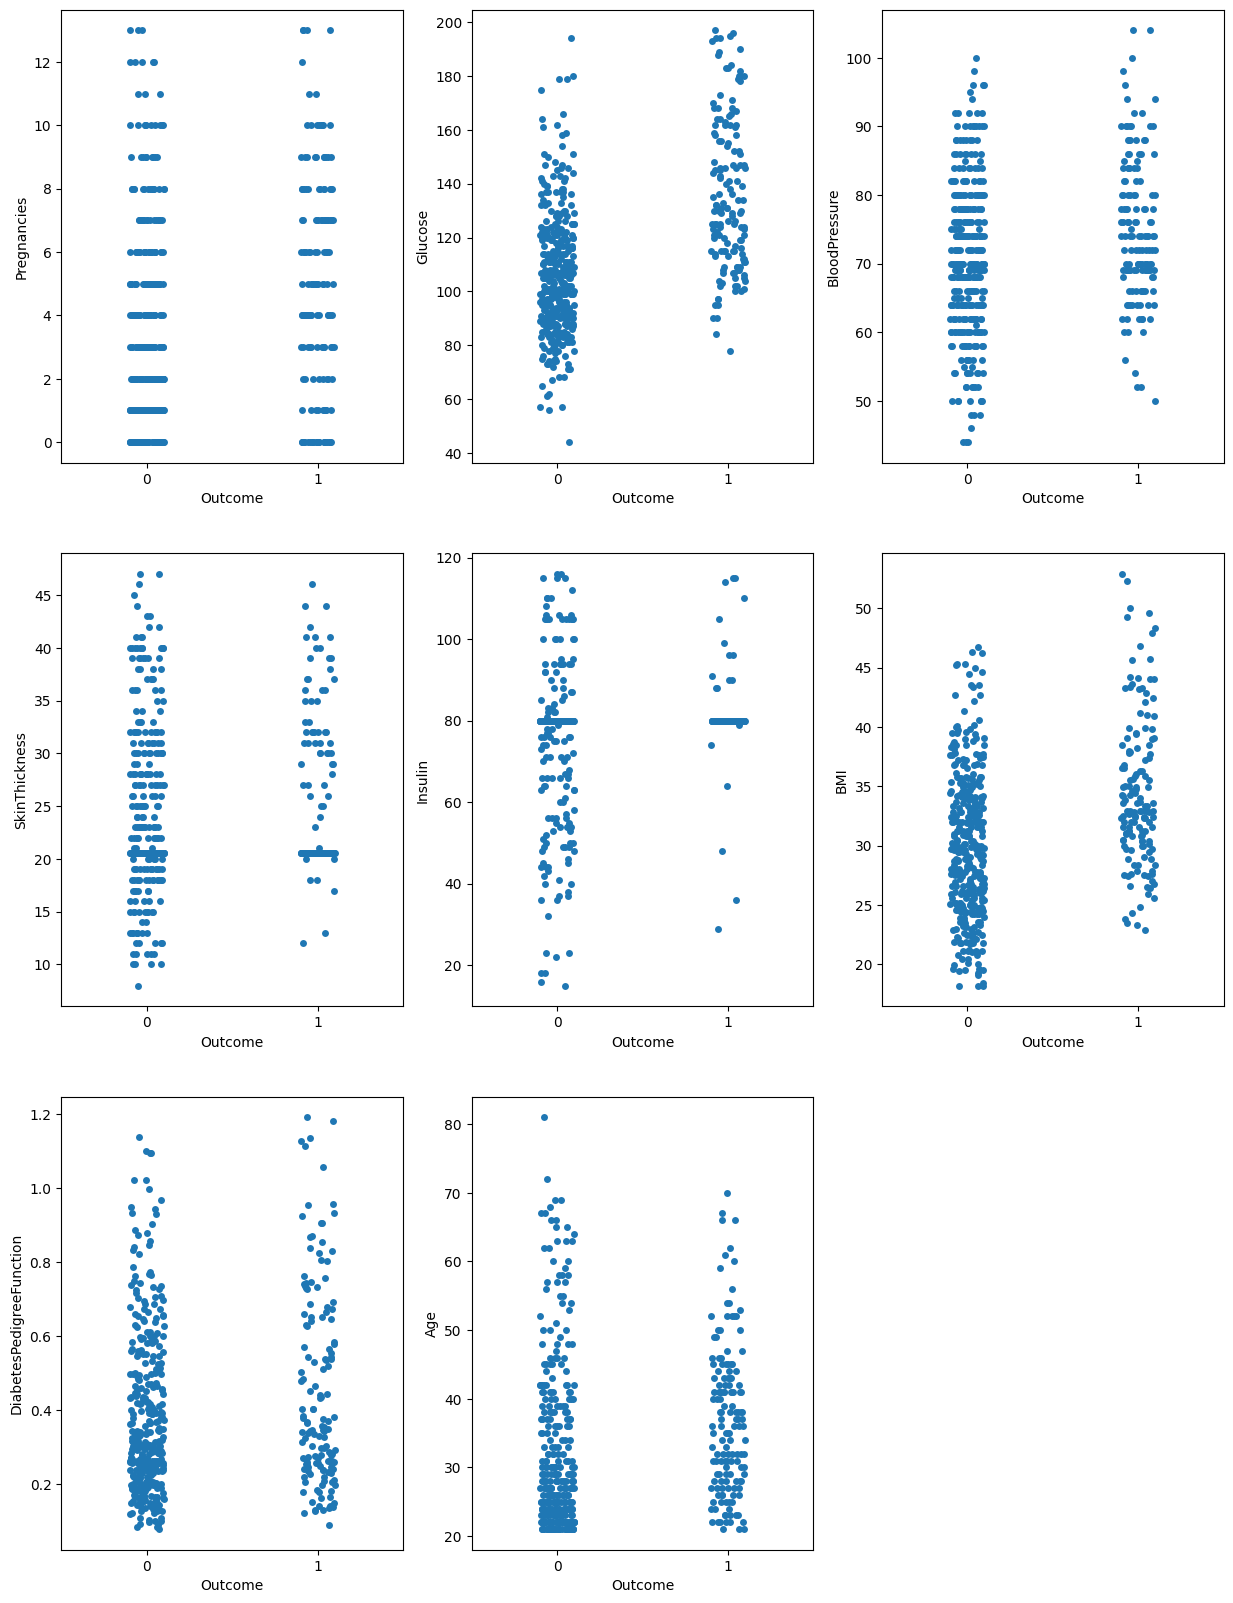

In [25]:
#Lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column])
    plotnumber +=1
plt.show()

In [26]:
#the graphs are now looking better
#now importing logestic regression algortihm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [27]:
#Lets stardize our data
scaler=StandardScaler()

In [28]:
x_scaler=scaler.fit_transform(x)
x_scaler

array([[ 0.660667  ,  1.21489459,  0.01270591, ...,  0.36951254,
         0.95856707,  1.40749112],
       [-0.88088934, -1.05394332, -0.54108391, ..., -0.71217016,
        -0.20856304, -0.1731259 ],
       [ 1.27728954,  2.4753601 , -0.72568051, ..., -1.2221063 ,
         1.14886003, -0.08993553],
       ...,
       [ 0.35235574,  0.24253549,  0.01270591, ..., -0.7739806 ,
        -0.65680866, -0.25631627],
       [-0.88088934,  0.42260199, -1.09487373, ..., -0.17132881,
        -0.2170205 ,  1.15792001],
       [-0.88088934, -0.76583692, -0.1718907 , ..., -0.12497098,
        -0.3607974 , -0.83864886]])

In [29]:
#checking vif
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['features']=x.columns
vif

,Score,features
0,1.346586,Pregnancies
1,1.215331,Glucose
2,1.279985,BloodPressure
3,1.287242,SkinThickness
4,1.050519,Insulin
5,1.413239,BMI
6,1.021498,DiabetesPedigreeFunction
7,1.554914,Age


In [30]:
#Now check by Train Test
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state= 94255)

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=lr.predict(x_test)

In [34]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8076923076923077
